In [1]:
from __future__ import division

from sympy import *
from sympy.matrices import *

init_printing(use_unicode=True)

In [2]:
m1, m2, omega, Lc, Rc = symbols("m_1 m_2 \\omega L_c R_c")
gamma, L, Zc = symbols("\\gamma L Z_c")

## Преобразование трансформатора к $A$ виду

In [3]:
Atr1 = Matrix([[m1, 0], [0, 1/m1]])
Atr1

In [4]:
Atr2 = Matrix([[1/m2, 0], [0, m2]])
Atr2

## Преобразование последовательного соединения `R` и `L` к $A$ виду

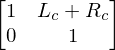

In [5]:
Arl = Matrix([[1, Rc + Lc], [0, 1]])
Arl

## Преобразование волноводного соединения к $A$ виду

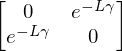

In [6]:
S = Matrix([[0, exp(-gamma*L)], [exp(-gamma*L),0]])
S

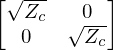

In [7]:
sqrtZ = Matrix([[sqrt(Zc),0],[0,sqrt(Zc)]])
sqrtZ

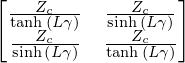

In [8]:
Z = simplify(sqrtZ*(eye(2)+S)*(eye(2)-S).inv()*sqrtZ)
Z

In [9]:
Awg = Matrix([[Z[0,0]/Z[1,0],Z.det()/Z[1,0]],[1/Z[1,0],Z[1,1]/Z[1,0]]])
Awg = simplify(Awg)
Awg

## Произведение матриц

In [10]:
SUM = simplify(Atr1*Arl*Awg*Arl*Atr2)
SUM

In [11]:
simplify(SUM[0,0]*SUM[1,1]-SUM[0,1]*SUM[1,0])

In [12]:
Z1 = expand(simplify((SUM[0,0]-1)/SUM[1,0]))

In [13]:
Z1

In [14]:
Z2 = expand(simplify((SUM[1,1]-1)/SUM[1,0]))

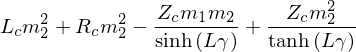

In [15]:
Z2

In [16]:
Z3 = simplify(1/SUM[1,0])

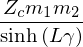

In [17]:
Z3

In [18]:
expand(simplify(Z1+Z3))

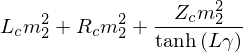

In [19]:
expand(simplify(Z2+Z3))